In [2]:
import cmdstanpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from cmdstanpy import CmdStanModel, cmdstan_path
import pickle
from hashlib import md5
import json
import arviz as az
import sys

```
# see = pd.read_csv("data/S2ETES.csv", names = ['type', 'size', 'name'], skiprows = True)
# see.type = see.type.apply(lambda x: int(str(x)[0]))
# see = see.loc[:,['type', 'size']]
# see.to_csv('data/S2ETES.csv', index = False)

type		  engine size	큰순대로
hs type				
1	e1		    1	e1
2	e2	    	2	e5
                2	e2-1
3	e3		    2	e2-2
4	e4		    3	e4
5	e5		    4	e3
```

In [5]:
import pandas as pd
import numpy as np
import cmdstanpy
import os
import arviz as az
from scipy.interpolate import splev
see = pd.read_csv("data/S2ETES.csv") # feature1: engine , feature2: shipsize

In [6]:
failure_df = pd.read_csv('data/failure_count.csv').set_index('age')
u = np.nanmean(failure_df.values.flatten())
s = np.sqrt(np.nanvar(failure_df.values.flatten()))
failure_df = pd.DataFrame((failure_df - u) / s, index=failure_df.index, columns=failure_df.columns)
engine_df = pd.read_csv('data/engine.csv').set_index('ship')

test_failure_df = pd.read_csv('data/failure_count_test.csv').set_index('age')
test_failure_df = pd.DataFrame((test_failure_df - u) / s, index=test_failure_df.index, columns=test_failure_df.columns)
test_engine_df = pd.read_csv('data/engine_test.csv').set_index('ship')

# original_df = df * s + u

In [7]:
degree = 3
knots = np.linspace(1, 31, num=5)
knots_padded = np.concatenate((np.full(degree, 1), knots, np.full(degree, 31)))

basis = []
for i in range(knots_padded.shape[0]):
    c = np.zeros(knots_padded.shape[0])
    c[i] = 1
    basis.append(splev(np.arange(1, 32), (knots_padded, c, degree)))
basis_df = pd.DataFrame(basis).transpose().set_index(np.arange(1, 32))

In [8]:
K = basis_df.shape[1]
T = 31
S = failure_df.shape[1]
E = np.unique(engine_df['engine']).shape[0]
Y = failure_df.values[~failure_df.isnull()]
age_index, ship_index = np.where(~failure_df.isnull())


In [15]:
pd.Series(Y).to_csv("x_age.csv", index=False)

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
age,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.855203,NaN,-0.701306,NaN,NaN,NaN,NaN,NaN,-0.921159
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.899174,1.541190,-0.481454,0.244060,0.815677,NaN,NaN,0.244060,-0.635350,-0.503439
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.217631,0.288030,-0.657336,-0.613365,-0.063734,NaN,0.837662,-0.239616,0.156119,-0.855203
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.233397,-0.701306,NaN,-0.503439,NaN,-0.283586,0.310016,0.815677,-0.217631,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.573839,0.617809,NaN,0.573839,-0.459468,NaN,-0.041748,0.002222,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.481454,0.222075,NaN,1.255382,NaN,NaN,NaN,-0.877188,NaN,-0.679321
7,NaN,NaN,NaN,NaN,-0.767262,NaN,NaN,NaN,NaN,NaN,...,1.189426,-0.107704,NaN,0.397957,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,-0.855203,NaN,NaN,NaN,NaN,NaN,...,-0.679321,NaN,NaN,-0.129689,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.310016,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test_Y = test_failure_df.values[~test_failure_df.isnull()]
test_age_index, test_ship_index = np.where(~test_failure_df.isnull())

In [28]:
pd.Series(age_index + 1).to_csv("data/x_age.csv", index=False)
pd.Series(Y).to_csv("data/y_count.csv", index=False)
pd.Series(test_age_index).to_csv("data/test_x_age.csv", index=False)
pd.Series(test_Y).to_csv("data/test_y_count.csv", index=False)

In [29]:
pd.Series(ship_index + 1).to_csv("data/ship_index.csv", index=False)
engine_df.loc[failure_df.columns, 'engine'].to_csv("data/engine_index.csv", index=False)


In [46]:
file = os.path.join('./stancode','layer3_nc_diffsd_parammubar.stan')
sm = CmdStanModel(stan_file=file)

K = basis_df.shape[1]
T = 31
S = failure_df.shape[1]
E = np.unique(engine_df['engine']).shape[0]
Y = failure_df.values[~failure_df.isnull()]
age_index, ship_index = np.where(~failure_df.isnull())

data = {
    'K' : K,
    'N' : Y.shape[0],
    'T' : T,
    'S' : S,
    'E' : E,
    'age': age_index + 1,
    'ship': ship_index + 1,
    'engine': engine_df.loc[failure_df.columns, 'engine'],
    'Y': Y,
    'B': basis_df,
}

fit = sm.sampling(data=data)
fit_df = fit.to_dataframe().mean()

samples = fit.extract()

NameError: name 'CmdStanModel' is not defined

In [15]:

original_df

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64,s65,s66,s67,s68,s69,s70,s71,s72,s73,s74,s75,s76,s77,s78,s79,s80,s81,s82,s83,s84,s85,s86,s87,s88,s89,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,4.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,13.0,NaN,8.0,1.0,NaN,1.0,NaN,3.0,NaN,NaN,45.0,35.0,2.0,113.0,21.0,54.0,80.0,NaN,NaN,54.0,14.0,20.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,7.0,5.0,27.0,17.0,NaN,NaN,25.0,56.0,76.0,13.0,NaN,29.0,33.0,56.0,13.0,15.0,40.0,NaN,81.0,32.0,50.0,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,52.0,5.0,78.0,31.0,25.0,NaN,1.0,13.0,68.0,47.0,NaN,62.0,99.0,11.0,NaN,20.0,NaN,30.0,57.0,80.0,33.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,46.0,51.0,79.0,NaN,28.0,NaN,35.0,37.0,31.0,17.0,NaN,83.0,69.0,71.0,NaN,69.0,22.0,NaN,41.0,43.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,37.0,44.0,58.0,1.0,80.0,24.0,46.0,46.0,49.0,14.0,NaN,14.0,21.0,53.0,NaN,100.0,NaN,NaN,NaN,3.0,NaN,12.0
7,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,82.0,NaN,NaN,NaN,73.0,65.0,118.0,7.0,45.0,22.0,NaN,74.0,97.0,38.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.0,42.0,NaN,NaN,NaN,22.0,17.0,38.0,NaN,NaN,NaN,NaN,24.0,12.0,NaN,NaN,37.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

NameError: name 'os' is not defined

NameError: name 'CmdStanModel' is not defined

In [19]:
layer3_f1_data = {
    "K" : 9,
    "N" : len(df.values[~np.isnan(df)]),  # number of total values
    "T" : df.shape[0],  # length of time of data(31)
    "S" : df.shape[1],  # number of ships(99)
    "E" : len(np.unique(see['engine'])),  # number of unique engines
    "Age": [int(i) for i in (np.where(~np.isnan(df))[0] + 1)],
    "S2F": list(see.loc[:,'engine']),  # engine type mapping
    "Ship": [int(i) for i in np.where(~np.isnan(df).transpose())[0] + 1],  # ship type mapping
    "Y": df.values[~np.isnan(df)].tolist(),  # all values to list
    "B": B5.values.tolist(),  # spline values, 2d list
 }

In [20]:
pd.set_option('display.max_rows', None)
pd.set_option("display.max_columns", None)
df
#pd.reset_option('display.max_rows')

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34,s35,s36,s37,s38,s39,s40,s41,s42,s43,s44,s45,s46,s47,s48,s49,s50,s51,s52,s53,s54,s55,s56,s57,s58,s59,s60,s61,s62,s63,s64,s65,s66,s67,s68,s69,s70,s71,s72,s73,s74,s75,s76,s77,s78,s79,s80,s81,s82,s83,s84,s85,s86,s87,s88,s89,s90,s91,s92,s93,s94,s95,s96,s97,s98,s99
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.921159,NaN,-0.921159,NaN,NaN,-0.855203,NaN,-0.701306,NaN,NaN,NaN,NaN,NaN,-0.921159
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156119,-0.657336,NaN,-0.767262,-0.921159,NaN,-0.921159,NaN,-0.877188,NaN,NaN,0.046193,-0.173660,-0.899174,1.541190,-0.481454,0.244060,0.815677,NaN,NaN,0.244060,-0.635350,-0.503439
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.063734,-0.789247,-0.833218,-0.349542,-0.569395,NaN,NaN,-0.393513,0.288030,0.727736,-0.657336,NaN,-0.305572,-0.217631,0.288030,-0.657336,-0.613365,-0.063734,NaN,0.837662,-0.239616,0.156119,-0.855203
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.503439,0.200089,-0.833218,0.771706,-0.261601,-0.393513,NaN,-0.921159,-0.657336,0.551854,0.090163,NaN,0.419942,1.233397,-0.701306,NaN,-0.503439,NaN,-0.283586,0.310016,0.815677,-0.217631,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002222,0.068178,0.178104,0.793691,NaN,-0.327557,NaN,-0.173660,-0.129689,-0.261601,-0.569395,NaN,0.881632,0.573839,0.617809,NaN,0.573839,-0.459468,NaN,-0.041748,0.002222,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.459468,-0.129689,0.024207,0.332001,-0.921159,0.815677,-0.415498,0.068178,0.068178,0.134134,-0.635350,NaN,-0.635350,-0.481454,0.222075,NaN,1.255382,NaN,NaN,NaN,-0.877188,NaN,-0.679321
7,NaN,NaN,NaN,NaN,-0.767262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.261601,0.859647,NaN,NaN,NaN,0.661780,0.485898,1.651117,-0.789247,0.046193,-0.459468,NaN,0.683765,1.189426,-0.107704,NaN,0.397957,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,-0.855203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
"""import pystan
pysm = pystan.StanModel(model_code=open(file, "r").read())
pysm_fit = pysm.sampling(data=layer3_f1_data, algorithm="Fixed_param")"""

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_ae24bfc048525584dba6de9eba8baa7e NOW.


things to do:
1. change adapt_delta and check divergence : 0.8: 6 of 4000 divergent transitions -> 0.99: no divergent transitions
2. change iter_warmup to some value > 2000
3. check data and make sure scale is same and data is going into the model correctly/intended
4. **try adjusting mu_a_bar and mu_w_bar (abnormal mean values, magnitude of tens of thousands) https://stats.stackexchange.com/questions/37611/parameters-without-defined-priors-in-stan

observed problems:
1. all mu values show up as NaN in summary() - fixed, problem with pd.where
2. parameters mu_w_bar, w_bar, a, w have low ESS - fixed by setting prior mu
3. parameters mu_a_bar, mu_w_bar, a_bar, w_bar, a, w have a massive Rhat score - fixed
4. suspicious values for w[x, 9], w[x, 1], which have orders of tens of thousands, and are the only values that have a low-ish rhat - fixed
5. traceplot results show some mu_w_bar values don't converge - **try changing prior of mu_w_bar** -> normal(0, 10) to normal(0, 1) improves result

doubts:
1. gamma(10, 10) prior? https://www.wolframalpha.com/input/?i=gamma%2810%2C+10%29&assumption=%7B%22C%22%2C+%22gamma%22%7D+-%3E+%7B%22ProbabilityDistribution%22%7D
2. informative priors - setting informative priors based on expected values on what each prior means.

In [38]:
f1_fit = layer3_model.sample(chains=4, cores=4, data=layer3_f1_data, adapt_delta=0.8)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3


In [39]:
f1_fit.diagnose()

INFO:cmdstanpy:Processing csv files: /tmp/tmp7vp60kpi/layer3_nc_diffsd_parammubar-202007201133-1-tuu_x8l3.csv, /tmp/tmp7vp60kpi/layer3_nc_diffsd_parammubar-202007201133-2-irp2qmlq.csv, /tmp/tmp7vp60kpi/layer3_nc_diffsd_parammubar-202007201133-3-erlshje9.csv, /tmp/tmp7vp60kpi/layer3_nc_diffsd_parammubar-202007201133-4-e1192xbt.csv

Checking sampler transitions treedepth.
3679 of 4000 (92%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
307 of 4000 (7.7%) transitions ended with a divergence.
These divergent transitions indicate that HMC is not fully able to explore the posterior distribution.
Try increasing adapt delta closer to 1.
If this doesn't remove all divergences, try to reparameterize the model.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI sati

"Processing csv files: /tmp/tmp7vp60kpi/layer3_nc_diffsd_parammubar-202007201133-1-tuu_x8l3.csv, /tmp/tmp7vp60kpi/layer3_nc_diffsd_parammubar-202007201133-2-irp2qmlq.csv, /tmp/tmp7vp60kpi/layer3_nc_diffsd_parammubar-202007201133-3-erlshje9.csv, /tmp/tmp7vp60kpi/layer3_nc_diffsd_parammubar-202007201133-4-e1192xbt.csv\n\nChecking sampler transitions treedepth.\n3679 of 4000 (92%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.\nTrajectories that are prematurely terminated due to this limit will result in slow exploration.\nFor optimal performance, increase this limit.\n\nChecking sampler transitions for divergences.\n307 of 4000 (7.7%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI sati

/home/dashadower/git_repos/aria/venv/lib/python3.6/site-packages/arviz/plots/backends/matplotlib/pairplot.py:216: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  UserWarning,


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc11ab3cc50>,
      dtype=object)

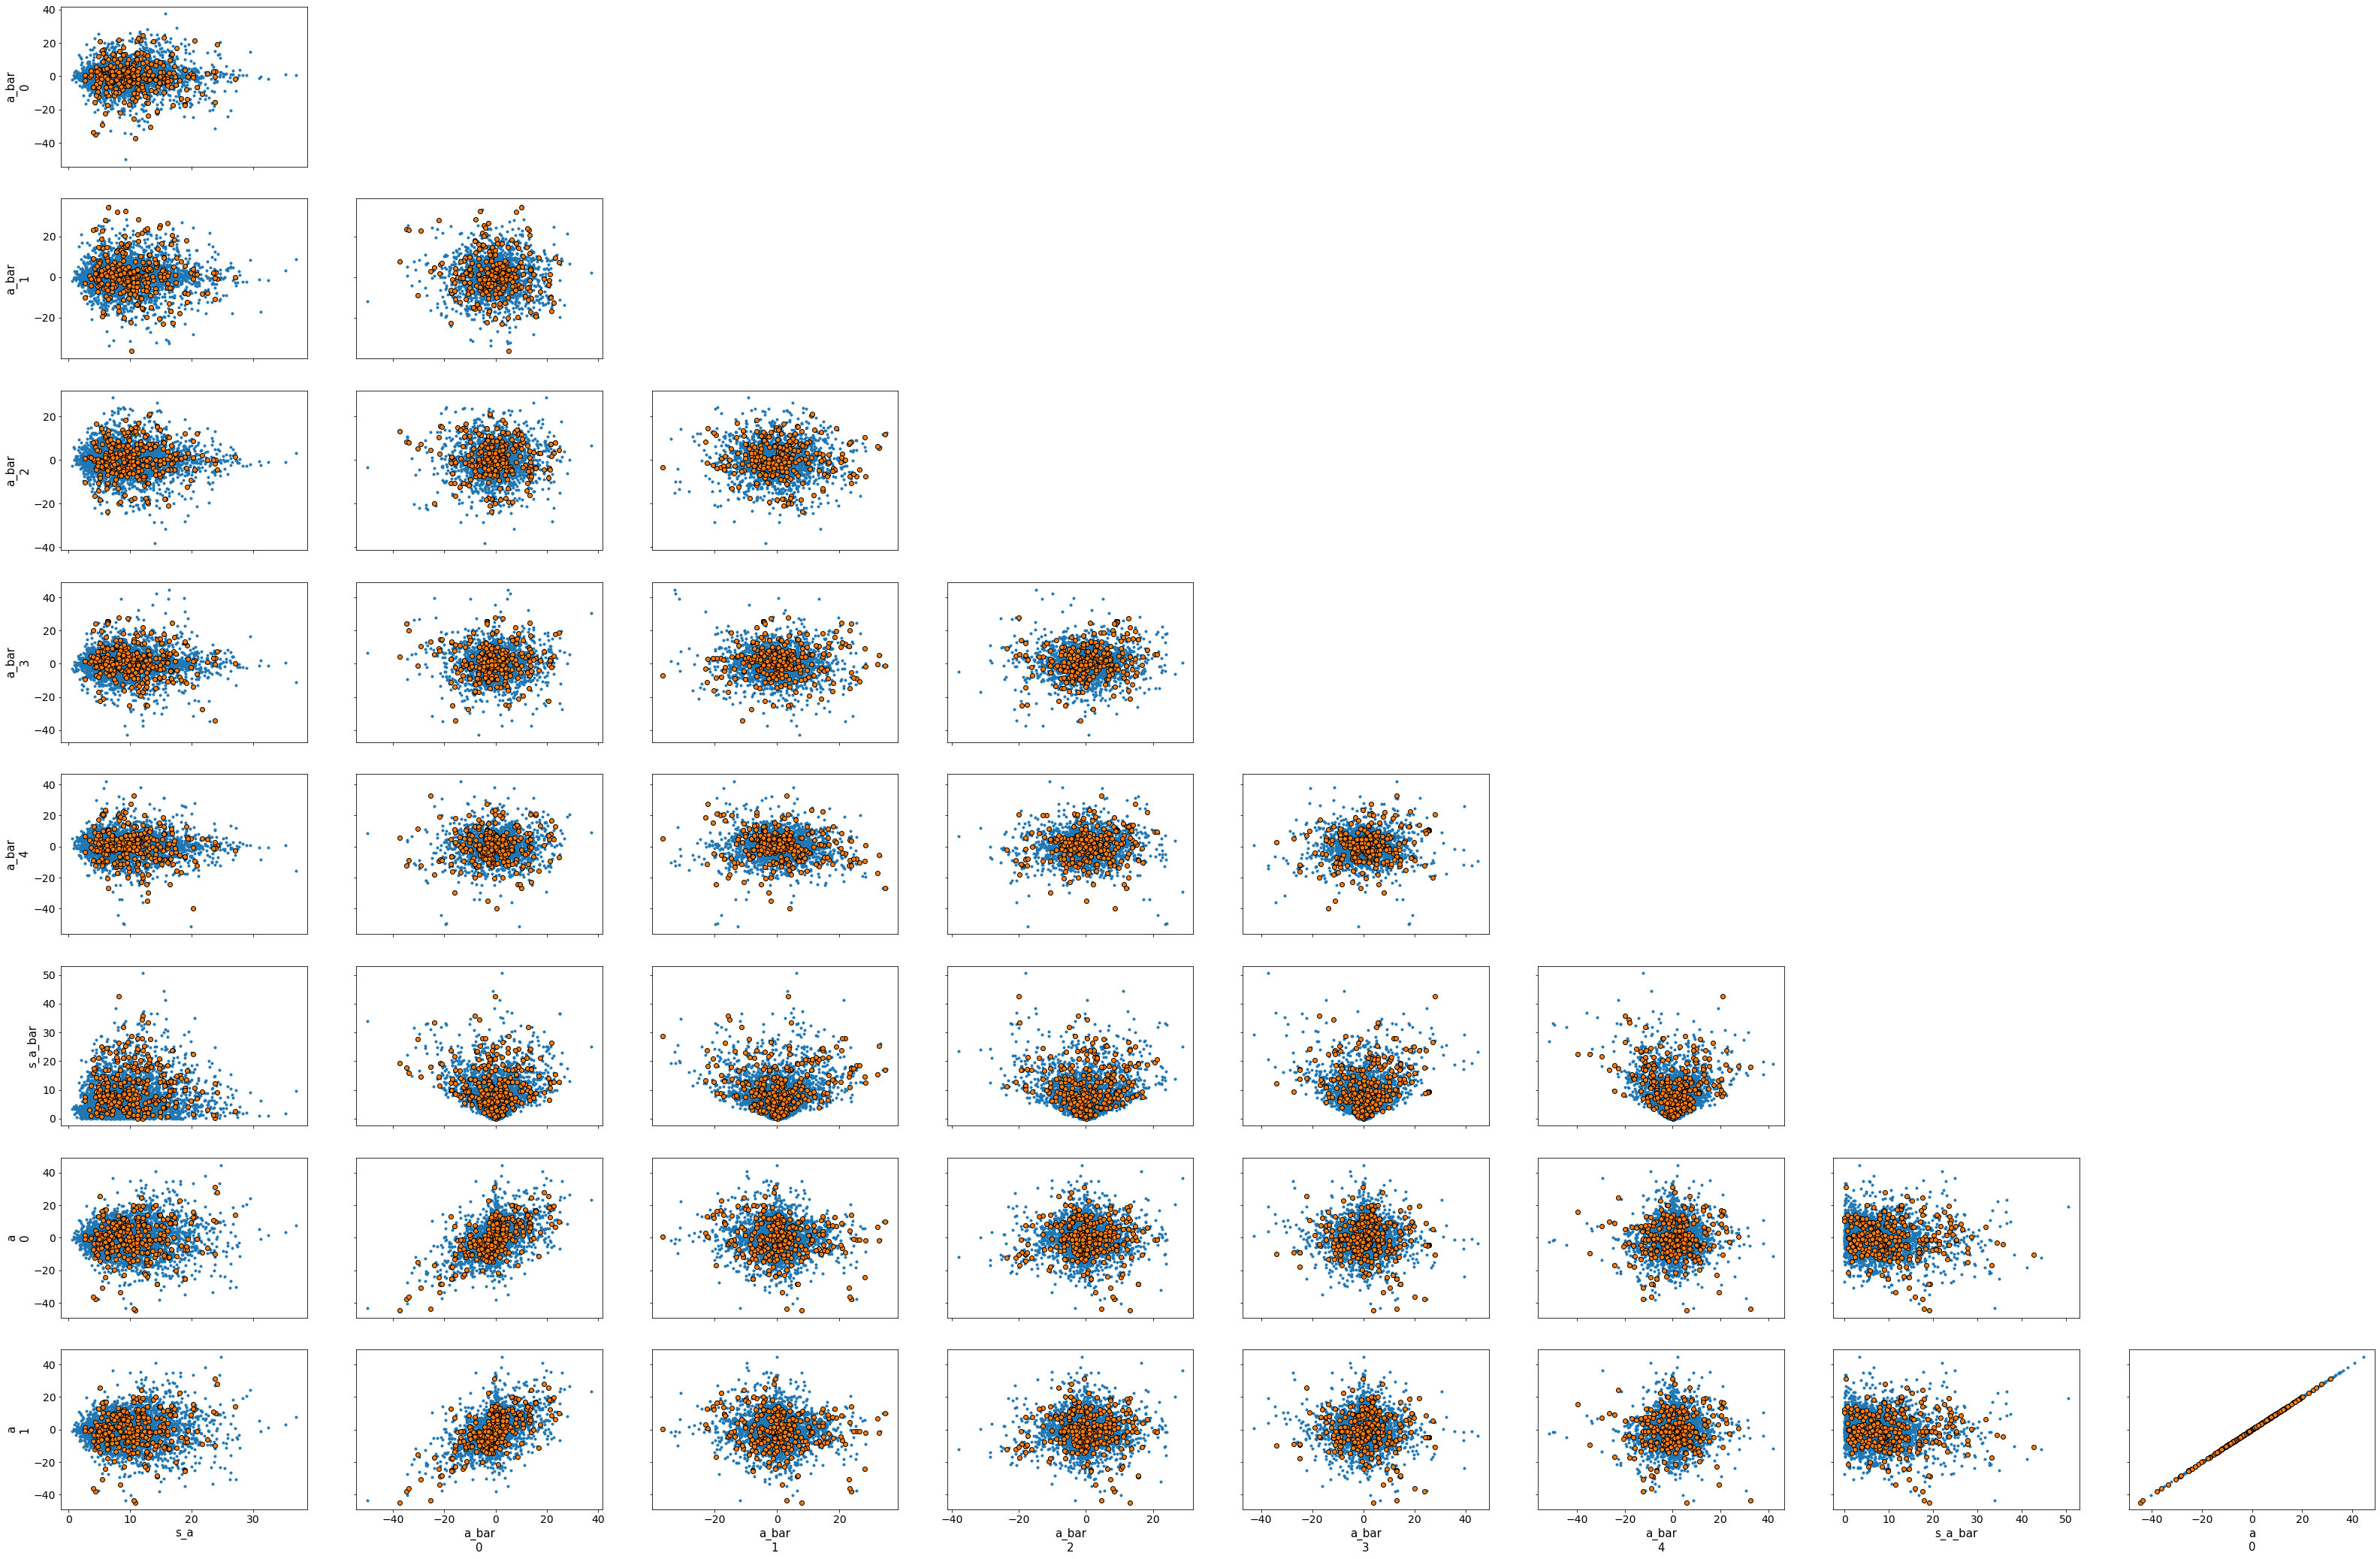

In [40]:
az_inference = az.from_cmdstanpy(posterior=f1_fit)
az.plot_pair(az_inference,group="posterior", var_names=["s_a", "a_bar", "s_a_bar", "a"],  kind="scatter", divergences=True)

In [41]:
az_inference

Inference data with groups:
	> posterior
	> sample_stats

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc17b249710>,
      dtype=object)

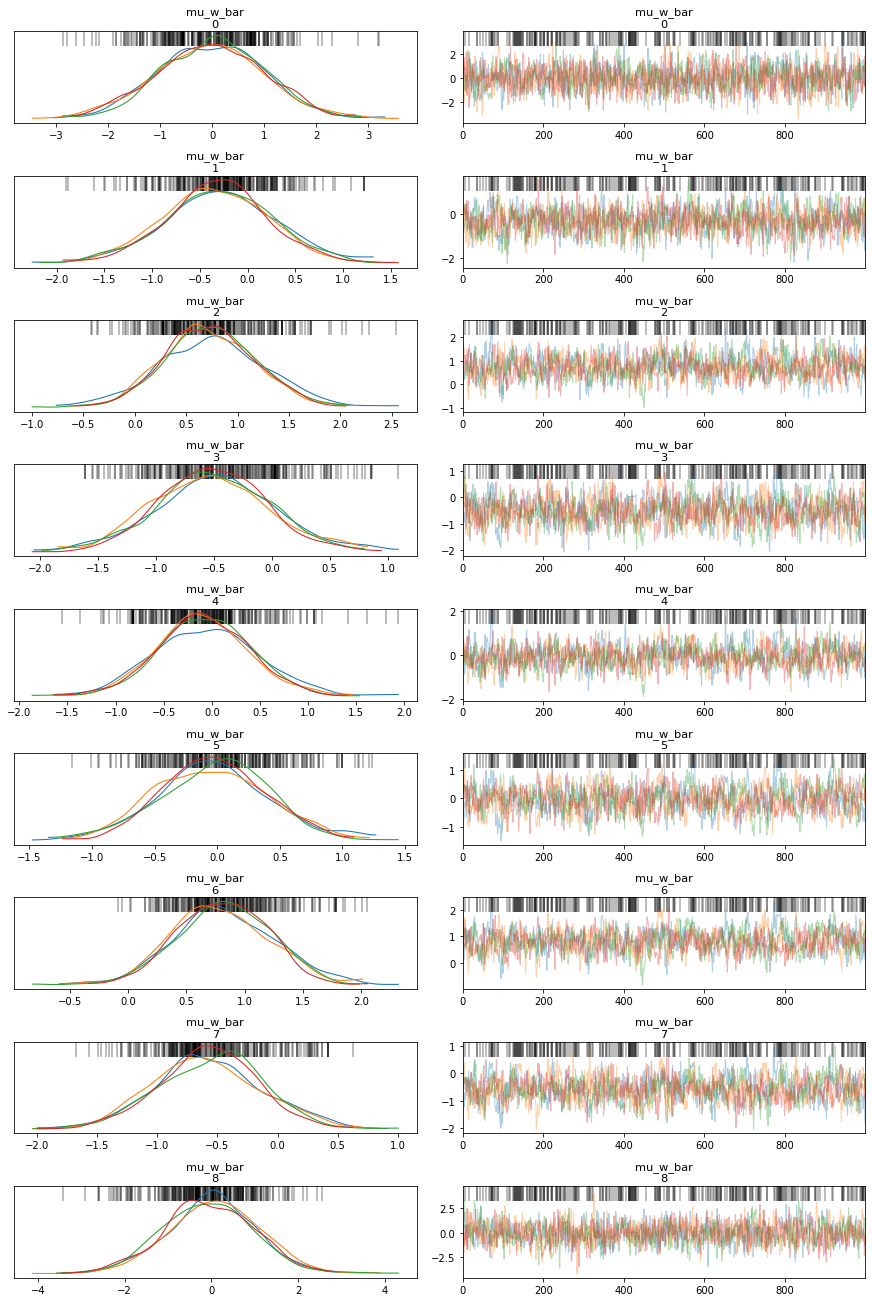

In [42]:
az.plot_trace(az_inference, var_names=["mu_w_bar"], combined=False, divergences="top")

##### f1_fit.get_drawset()[["s_a"]]
#f1_gq = layer3_model.generate_quantities(data=layer3_f1_data, mcmc_sample=f1_fit)

In [14]:
f2_fit = layer3_model.sample(chains=4, cores=4, data=layer3_f2_data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:finish chain 2


## TODO find better fitting model
1. f1_fit과 f2_fit의 rhat값 개선 : 특히 mu_a, mu_w들 rhat값 감소 (stan file의 reparameterization등 필요)
f1_fit
<img src = "https://www.dropbox.com/s/y2jd7lua08gguy9/f1fit.png?raw=1"/>
f2_fit
<img src = "https://www.dropbox.com/s/ez1ic7ipmi5b2yi/f2fit.png?raw=1"/>
2. 시도 실험 예시

prior predictive 

[Adapt-delta(클수록 적은 step size)증가에 따른 divergence 개수 plot](https://betanalpha.github.io/assets/case_studies/divergences_and_bias.html)

reference:
visualize the estimates to check which data points correspond to the large ˆk values.
https://arxiv.org/pdf/1507.04544.pdf

## stacking


In [15]:
def calculate_loo(stan_fit):
    data_ar = az.from_cmdstanpy(
        posterior = stan_fit,
        log_likelihood='log_likelihood',
        )
    return az.loo(data_ar), data_ar

In [16]:
f2_fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-2.677290e+03,7.238490e-01,6.169310e+00,-2688.13000,-2676.94000,-2.667800e+03,72.64040,0.155660,1.07272
mu_a_bar,-4.266150e+03,2.322410e+03,3.883210e+03,-11092.40000,-4251.40000,1.603010e+03,2.79579,0.005991,2.11438
mu_w_bar[1],2.286460e+06,2.816410e+06,4.175530e+06,-355865.00000,44671.40000,1.112890e+07,2.19803,0.004710,3.81417
mu_w_bar[2],3.163820e+03,2.035490e+03,3.583030e+03,-2324.61000,3188.54000,9.676780e+03,3.09859,0.006640,1.88046
mu_w_bar[3],3.221580e+03,2.035180e+03,3.582500e+03,-2280.25000,3245.10000,9.749780e+03,3.09861,0.006640,1.88051
...,...,...,...,...,...,...,...,...,...
log_likelihood[649],-4.680500e+00,2.264270e-03,1.223480e-01,-4.92506,-4.65053,-4.541980e+00,2919.68000,6.256550,1.00101
log_likelihood[650],-6.469790e+00,9.109770e-03,5.014420e-01,-7.34211,-6.43855,-5.702040e+00,3029.89000,6.492710,1.00018
log_likelihood[651],-4.591030e+00,1.667470e-03,6.029080e-02,-4.71092,-4.57838,-4.522060e+00,1307.34000,2.801490,1.00183


In [17]:
f1_df = f1_fit.summary()
f2_df = f2_fit.summary()
f1_fcst = [f1_df.loc[f'mu{[i]}', 'Mean']  for i in range(1, df.shape[0] + 1)]
f2_fcst = [f2_df.loc[f'mu{[i]}', 'Mean']  for i in range(1, df.shape[0] + 1)]

In [19]:
f1_fit_az = calculate_loo(f1_fit)[1]
f2_fit_az = calculate_loo(f2_fit)[1]

In [20]:
model_dict = {"f1_fit": f1_fit_az, "f2_fit": f2_fit_az}
az.compare(model_dict, method = 'stacking')  #method = 'BB-pseudo-BMA'(default)

/home/dashadower/.local/lib/python3.6/site-packages/arviz/stats/stats.py:151: UserWarning: 
The scale is now log by default. Use 'scale' argument or 'stats.ic_scale' rcParam if you rely on a specific value.
A higher log-score (or a lower deviance) indicates a model with better predictive accuracy.
  "\nThe scale is now log by default. Use 'scale' argument or "


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
f2_fit,0,-3324.18,14.3192,0,0.5,29.231,0,False,log
f1_fit,1,-3324.49,14.6505,0.309802,0.5,29.5708,0.352013,False,log


In [21]:
loo_f1 = az.loo(f1_fit_az, pointwise = True)

In [ ]:
loo_engine

In [22]:
plt.plot(loo_engine.pareto_k)

NameError: name 'plt' is not defined

In [ ]:
loo_shipsize = az.loo(shipsize_fit_az, pointwise = True)
print(loo_shipsize)
plt.plot(loo_shipsize.pareto_k)

In [ ]:
# visualize the estimates to check which data points correspond to the large ˆk values.
# https://arxiv.org/pdf/1507.04544.pdf

method='BB-pseudo-BMA'
            waic	p_waic	d_waic	weight	      se	dse	warning	waic_scale
type_fit	6663.49	13.6865	0	    0.839119	61.6467	0	    1	deviance
size_fit	6667.19	11.6609	3.70376	0.160881	61.6838	1.82401	1	deviance

forecast: ([25.6998737 , 25.6998737 , 25.6998737 , 25.6998737 , 25.6998737 ,
       27.18525614, 27.18525614, 27.18525614, 27.18525614, 27.18525614,
       27.18525614, 27.77222374, 27.77222374, 27.77222374, 27.77222374,
       27.77222374, 27.77222374, 27.77222374, 27.77222374, 27.77222374,
       27.44936703, 28.16864965, 28.16864965, 28.16864965, 28.16864965,
       28.16864965, 28.16864965, 28.16864965, 28.16864965, 28.16864965,
       28.16864965])
       
       
method='stacking'      

weight가 0.5, 0.5, se가 60.11, 60.16 제외 모두 동일

warning: 1 

## final forecast - combine two models with likliehood weight ( prophet, linear_ridge @김)

In [ ]:
az.compare(compare_dict)['weight']['f1_fit'] *  np.asarray(f1_fcst) + \
az.compare(compare_dict)['weight']['f2_fit'] *  np.asarray(f2_fcst)

## 위의 예측방식이 기존 한 feature로만 예측 보다 더 낫다. 